# 일변량 통계에 대한 함수 selectPercentile()

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data),50))
X_w_noise = np.hstack([cancer.data,noise])

In [2]:
cancer.data.shape

(569, 30)

In [3]:
X_w_noise.shape

(569, 80)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X_w_noise,cancer.target,
                                                random_state=0,test_size=.5)

In [5]:
print(X_train.shape,X_test.shape)

(284, 80) (285, 80)


In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9403508771929825

# selectPercentile()함수 자체는 아노바 분석처럼 변수간의 유의확률 중 가장 높은 변수들을 가져오고 필요 없는 변수들을 제거해줌

In [7]:
select = SelectPercentile(score_func=f_classif, percentile=50)
select.fit(X_train,y_train)

SelectPercentile(percentile=50)

In [8]:
X_train_selected = select.transform(X_train)

In [9]:
X_train_selected.shape

(284, 40)

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x22792ca37f0>], [Text(0, 0, '')])

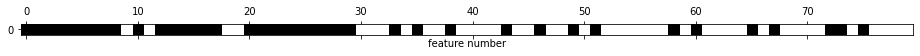

In [10]:
mask = select.get_support()
print(mask)
import matplotlib.pyplot as plt

plt.matshow(mask.reshape(1,-1),cmap='gray_r')
plt.xlabel("feature number")
plt.yticks([0])

In [11]:
X_test_selected = select.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train_selected,y_train)
lr.score(X_test_selected,y_test)

0.9333333333333333

In [13]:
from sklearn.svm import LinearSVC
lr = LinearSVC()
lr.fit(X_train_selected,y_train)
lr.score(X_test_selected,y_test)

C:\Users\CPB06GameN\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8666666666666667

# p311 전문가 지식 활용 (citibike) 데이터

In [14]:
import mglearn.datasets
import pandas as pd
citibike = mglearn.datasets.load_citibike()
print("citibike_data:\n",citibike.head())

citibike_data:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


In [15]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

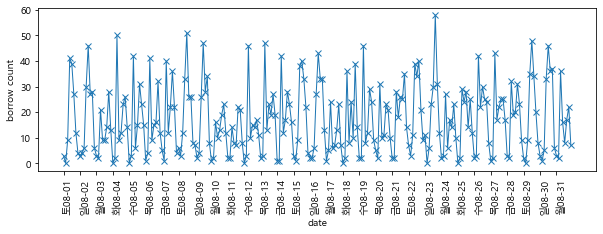

In [16]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(),end=citibike.index.max(),
                      freq='D')
week = ["일","월","화","수","목","금","토"]
xticks_name = [week[int(w)]+d for w, d in zip(xticks.strftime("%w"),
                                             xticks.strftime("%m-%d"))]
plt.xticks(xticks, xticks_name, rotation=90, ha ="left")
plt.plot(citibike, linewidth=1, marker='x')
plt.xlabel("date")
plt.ylabel("borrow count")
plt.show()

In [17]:
y = citibike.values

In [18]:
X = citibike.index.astype("int64").values.reshape(-1,1) // 10**9

In [19]:
X

array([[1438387200],
       [1438398000],
       [1438408800],
       [1438419600],
       [1438430400],
       [1438441200],
       [1438452000],
       [1438462800],
       [1438473600],
       [1438484400],
       [1438495200],
       [1438506000],
       [1438516800],
       [1438527600],
       [1438538400],
       [1438549200],
       [1438560000],
       [1438570800],
       [1438581600],
       [1438592400],
       [1438603200],
       [1438614000],
       [1438624800],
       [1438635600],
       [1438646400],
       [1438657200],
       [1438668000],
       [1438678800],
       [1438689600],
       [1438700400],
       [1438711200],
       [1438722000],
       [1438732800],
       [1438743600],
       [1438754400],
       [1438765200],
       [1438776000],
       [1438786800],
       [1438797600],
       [1438808400],
       [1438819200],
       [1438830000],
       [1438840800],
       [1438851600],
       [1438862400],
       [1438873200],
       [1438884000],
       [14388

In [20]:
n_train = 184 
def eval_on_features(features,target,regreesor):
    X_train,X_test = features[:n_train], features[n_train:]
    y_train,y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train,y_train)
    print("테스트 세트 R^2:{:.2f}".format(regressor.score(X_test,y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    
    plt.xticks(range(0, len(X),8), xticks_name,rotation=90,ha="left")
    
    plt.plot(range(n_train),y_train,label="훈련")
    plt.plot(range(n_train,len(y_test)+n_train),y_test,'-',label="테스트")
    plt.plot(range(n_train),y_pred_train,"--",label="훈련 예측")
    
    plt.plot(range(n_train, len(y_test)+n_train),y_pred,"--",label = "테스트 예측")
    plt.legend(loc=(1.01,0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

테스트 세트 R^2:-0.04


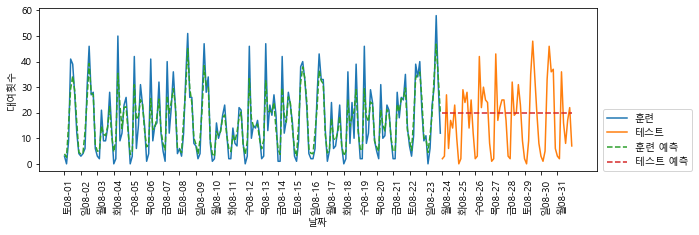

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
eval_on_features(X,y,regressor)


In [22]:
X_hour = citibike.index.hour.values.reshape(-1,1)

테스트 세트 R^2:0.60


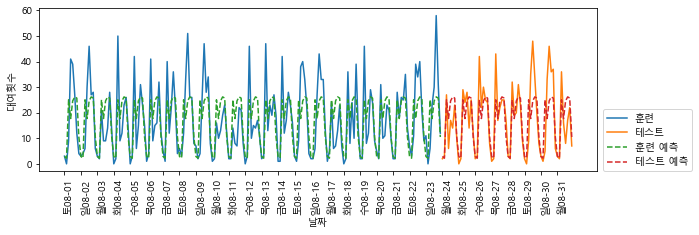

In [23]:
eval_on_features(X_hour,y,regressor)

테스트 세트 R^2:0.84


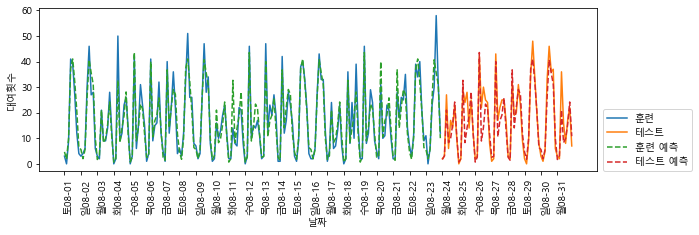

In [24]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                        citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week,y,regressor)

테스트 세트 R^2:0.84


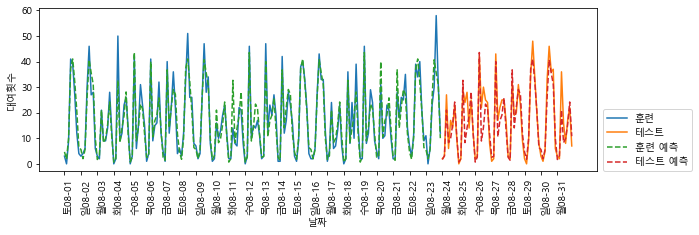

In [25]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week,y,LinearRegression())